# Import Libraries

In [103]:
import numpy as np
import pandas as pd
import sklearn
from sklearn import datasets, linear_model, metrics
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

#  Developing Linear Regression Model

In [104]:
def initialize_with_zeros(dim):
    w = np.zeros(shape=(dim, 1))
    b = np.zeros((1,))
    return w, b

def h(w,b,x):
    y_pred = np.dot(x,w) + b
    return y_pred

def cost(w, b, x, y,y_pred ):
    m= x.shape[0]
    j= np.sum((y_pred-y)**2)/(2*m)
    return j

def gradient(x, y,y_pred ):
    m = x.shape[0]
    res = y_pred- y
    dw = 1/m * np.dot(x.T,res)
    db = 1/m * np.sum(res)
    return dw,db

def update_parameters(w,b,dw,db,alpha):
    w = w - alpha * dw
    b = b - alpha * db
    return w,b

def my_r2_score(y,y_pred):
    ssr = np.sum((y_pred - y)**2)
    sst = np.sum((y - np.mean(y))**2)
    r2_score = 1 - (ssr/sst)
    print("r2 score",r2_score)
    return r2_score

def GD(x,y):
    loss = []
    w_list=[]
    b_list=[]
    y_pred_list=[]

    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        y_pred=h(w,b,x)
        j = cost(w,b, x, y,y_pred )
        loss.append(j)
        dw, db = gradient(x, y,y_pred)
        w,b = update_parameters(w,b , dw,db,  alpha)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x,y_pred)

        
    return w,b,loss,w_list,b_list

def create_mini_batches(x,y,batch_size):
    mini_batches = []
    data = np.hstack((x, y))
    #np.random.shuffle(data)
    n_minibatches = x.shape[0] // batch_size

    for i in range(n_minibatches ):
        mini_batch = data[i * batch_size:(i + 1)*batch_size, :]
        x_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((x_mini, y_mini))
        
    if data.shape[0] % batch_size != 0:
        mini_batch = data[i * batch_size:data.shape[0]]
        x_mini = mini_batch[:, :-1]
        y_mini = mini_batch[:, -1].reshape((-1, 1))
        mini_batches.append((x_mini, y_mini))
    
    return mini_batches

def model(x,y,batch_size,alpha,max_iterations):
    loss = []
    w_list=[]
    b_list=[]
    w,b = initialize_with_zeros(x.shape[1])
    mini_batches = create_mini_batches(x, y, batch_size)

    for i in range(max_iterations):
        for mini_batch in mini_batches:
            x_mini, y_mini = mini_batch
            y_pred=h(w,b,x_mini)
            j = cost(w,b,x_mini, y_mini,y_pred )
            loss.append(j)
            dw, db = gradient(x_mini, y_mini,y_pred)
            w,b = update_parameters(w,b , dw,db,  alpha)
            w_list.append(w)
            b_list.append(b)
    print("w",w)
    print("b",b)
   
    return w,b,loss,w_list,b_list

def cost_stochastic(w, b, x, y,y_pred ):
    j=((y_pred-y)**2)/(2)
    return j

def stochastic_GD(x,y,m):
    loss = []
    w_list=[]
    b_list=[]
    w,b = initialize_with_zeros(x.shape[1])
    for i in range(max_iterations) :
        for n in range(0, m):
            y_pred=h(w,b,x[n,:])
            j = cost_stochastic(w,b, x[n,:], y[n],y_pred )
            loss.append(j)
            dw, db = gradient(x[n,:], y[n],y_pred)
            w,b = update_parameters(w,b , dw,db,  alpha)
            w_list.append(w)
            b_list.append(b)
    return w,b,loss,w_list,b_list

def update_parameters_momentum(w, b, dw, db, alpha, vw, vb, gamma):
    vw = gamma * vw + alpha * dw
    vb = gamma * vb + alpha * db
    w = w - vw
    b = b - vb
    return w, b, vw, vb

def Gd_momentum(x, y, alpha, gamma, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_momentum(w, b, dw, db, alpha, vw, vb,
                                                  gamma)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

def update_parameters_nag(w, b, dw, db, alpha, vw, vb, gamma):
    w = w - alpha * dw
    b = b - alpha * db
    vw = gamma * vw + alpha * dw
    vb = gamma * vb + alpha * db

    return w, b, vw, vb

def Gd_NAG(x, y, alpha, gamma, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        w = w - gamma * vw
        b = b - gamma * vb
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_nag(w, b, dw, db, alpha, vw, vb,
                                             gamma)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

def update_parameters_adagrad(w, b, dw, db, alpha, vw, vb, eps):
    vw = vw + dw**2
    vb = vb + db**2
    w = w - (alpha / (eps + np.sqrt(vw))) * dw
    b = b - (alpha / (eps + np.sqrt(vb))) * db
    return w, b, vw, vb

def Gd_adagrad(x, y, alpha, eps, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_adagrad(w, b, dw, db, alpha, vw, vb, eps)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

def update_parameters_RMSProp(w, b, dw, db, alpha, vw, vb, eps,gamma):
    vw = gamma*vw + (1-gamma)*(dw**2)
    vb = gamma*vb + (1-gamma)*(db**2)
    w = w - (alpha / (eps + np.sqrt(vw))) * dw
    b = b - (alpha / (eps + np.sqrt(vb))) * db
    return w, b, vw, vb

def Gd_RMSProp(x, y, alpha, eps,gamma, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []

    w, b = initialize_with_zeros(x.shape[1])
    vw = 0
    vb = 0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        w, b, vw, vb = update_parameters_RMSProp(w, b, dw, db, alpha, vw, vb, eps,gamma)
        w_list.append(w)
        b_list.append(b)
        #plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list

def update_parameters_adam(w, b, dw, db, alpha, vw, vb,mw,mb,eps,gamma1,gamma2,num_updates):
    mw = gamma1*mw + (1-gamma1)*(dw)
    mb = gamma1*mb + (1-gamma1)*(db)
    mw_corr = mw/(1-(gamma1**num_updates))
    mb_corr = mb/(1-(gamma1**num_updates))
    
    vw = gamma2*vw + (1-gamma2)*(dw**2)
    vb = gamma2*vb + (1-gamma2)*(db**2)
    vw_corr = vw/(1-(gamma2**num_updates))
    vb_corr = vb/(1-(gamma2**num_updates))
    
    w = w - (alpha / (eps + vw_corr**0.5)) * mw_corr
    b = b - (alpha / (eps + vb_corr**0.5)) * mb_corr
    return w, b, vw, vb ,mw,mb

def Gd_adam(x, y, alpha, eps,gamma1,gamma2, max_iterations):
    loss = []
    w_list = []
    b_list = []
    y_pred_list = []
    w, b = initialize_with_zeros(x.shape[1])
    vw = 0;vb = 0;mw = 0;mb = 0
    num_updates=0
    for i in range(max_iterations):
        y_pred = h(w, b, x)
        j = cost(w, b, x, y, y_pred)
        loss.append(j)
        dw, db = gradient(x, y, y_pred)
        num_updates= i+1
        w, b, vw, vb,mw,mb = update_parameters_adam(w,b,dw,db,alpha,vw,vb,mw,mb,eps,gamma1,gamma2,num_updates)
        w_list.append(w)
        b_list.append(b)
        
        #plt.plot(x, y_pred)

    return w, b, loss, w_list, b_list


# Generate Data


In [105]:
a=-2;b=1
x=np.linspace(0,20)
x=x.reshape((x.shape[0]),1)
y=((a*x)+b).reshape((x.shape[0]),1)

# Batch GD

In [106]:
w, b, loss, w_list, b_list = model(x, y, batch_size=50, alpha=0.001, max_iterations=500)
r=my_r2_score(y, h(w,b,x))


w [[-1.92523764]]
b [-0.00508809]
r2 score 0.9981249841233275


Text(0, 0.5, 'Loss')

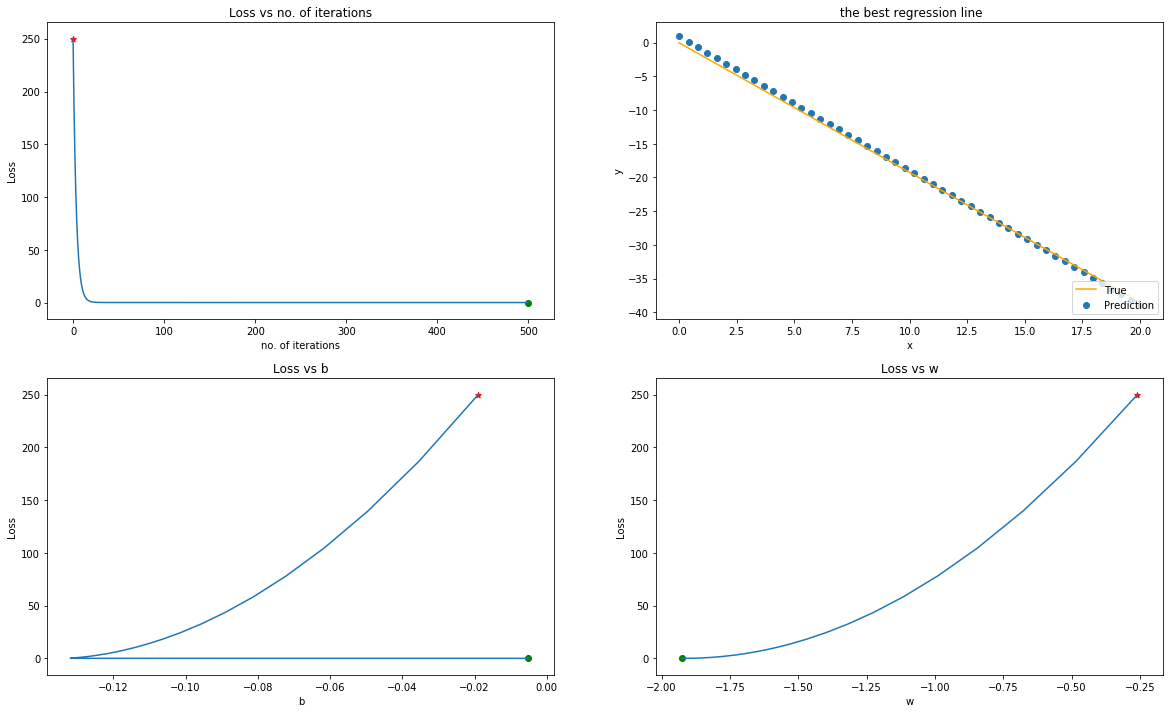

In [107]:
#ploting Batch DG

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



# Mini-Batch GD

In [108]:
w, b, loss, w_list, b_list = model(x, y, batch_size=5, alpha=0.001, max_iterations=500)
r=my_r2_score(y, h(w,b,x))


w [[-1.97992287]]
b [0.6840506]
r2 score 0.9998036340330834


Text(0, 0.5, 'Loss')

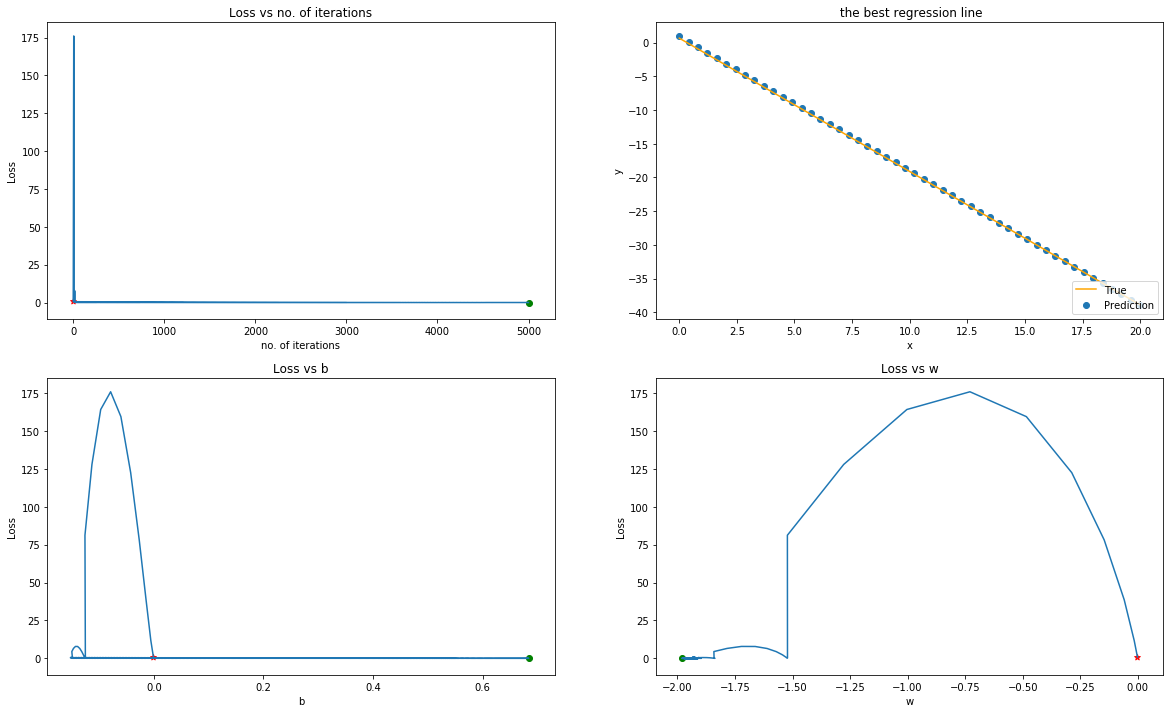

In [109]:
#ploting Mini-Batch DG

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

# Stochastic GD

In [110]:
w, b, loss, w_list, b_list = model(x, y, batch_size=1, alpha=0.001, max_iterations=500)
r=my_r2_score(y, h(w,b,x))


w [[-1.9997598]]
b [0.99537836]
r2 score 0.9999999500742659


Text(0, 0.5, 'Loss')

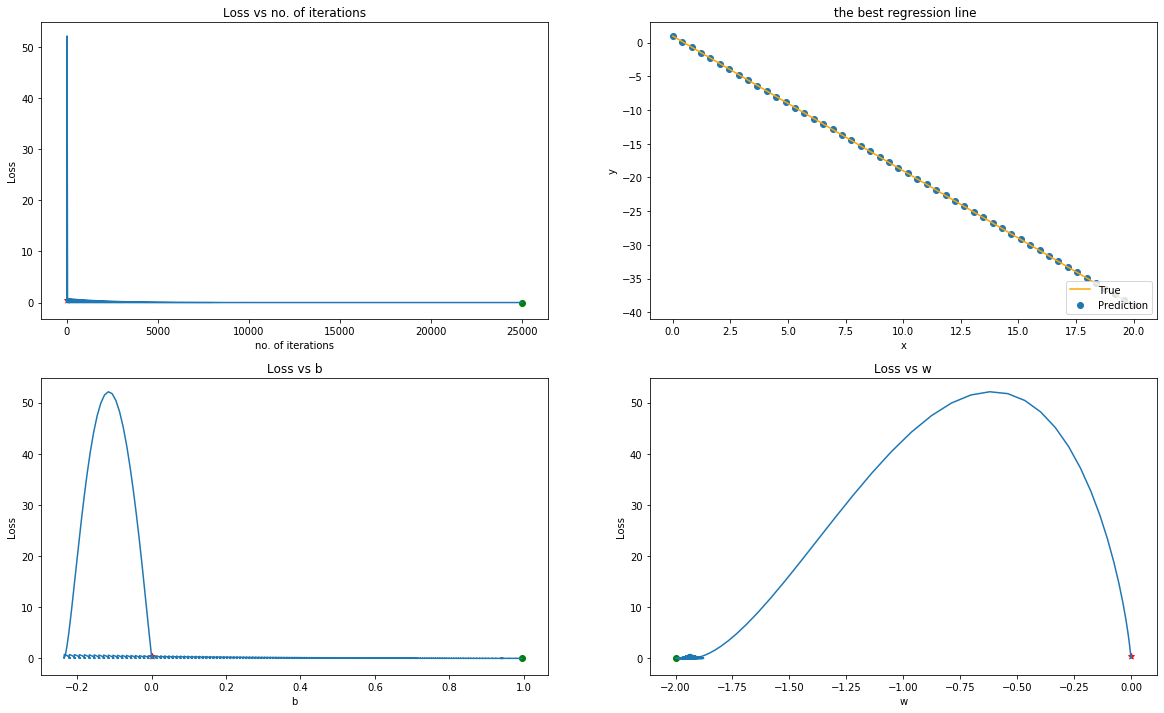

In [111]:
#ploting Stochasting DG

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")

#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")


#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")


#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

# GD with Momentum

In [112]:
w,b,loss,w_list,b_list = Gd_momentum(x, y,alpha=0.001,gamma=0.9,max_iterations=500)
r=my_r2_score(y, h(w,b,x))


r2 score 0.9998160587105572


Text(0, 0.5, 'Loss')

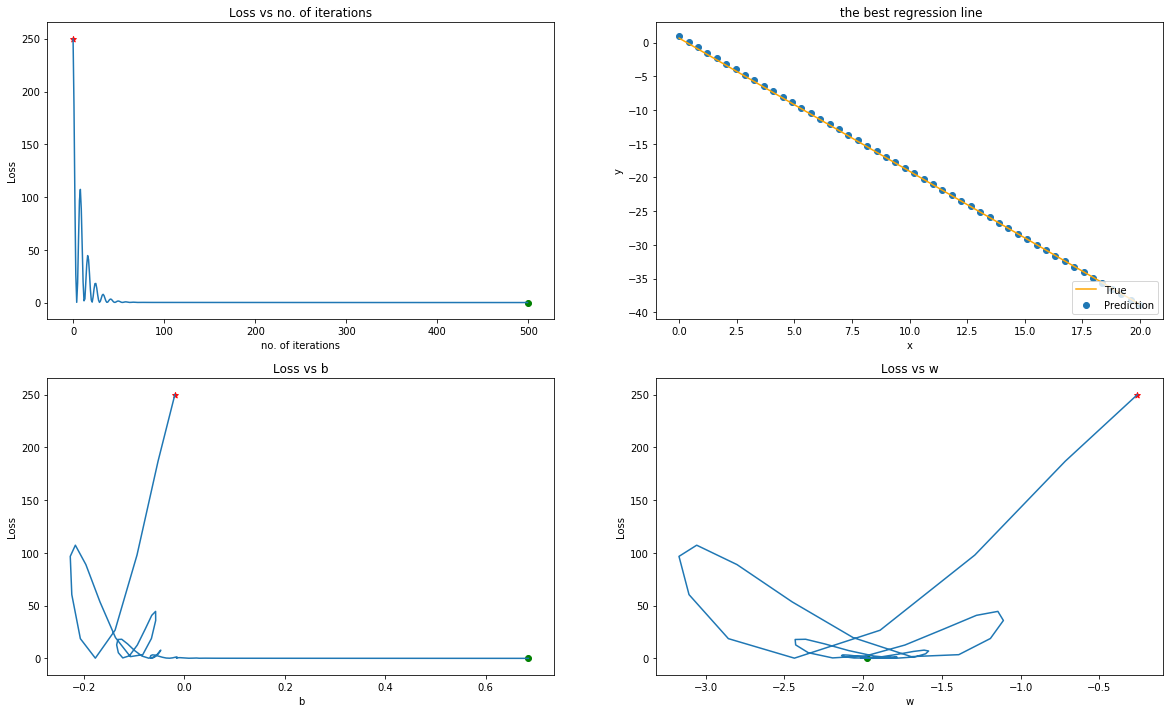

In [113]:
#ploting DG with Momentum

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



# Gd with NAG

In [114]:
w,b,loss,w_list,b_list = Gd_NAG(x, y,alpha=0.001,gamma=0.8,max_iterations=500)
r=my_r2_score(y, h(w,b,x))


r2 score 0.9993241237368777


Text(0, 0.5, 'Loss')

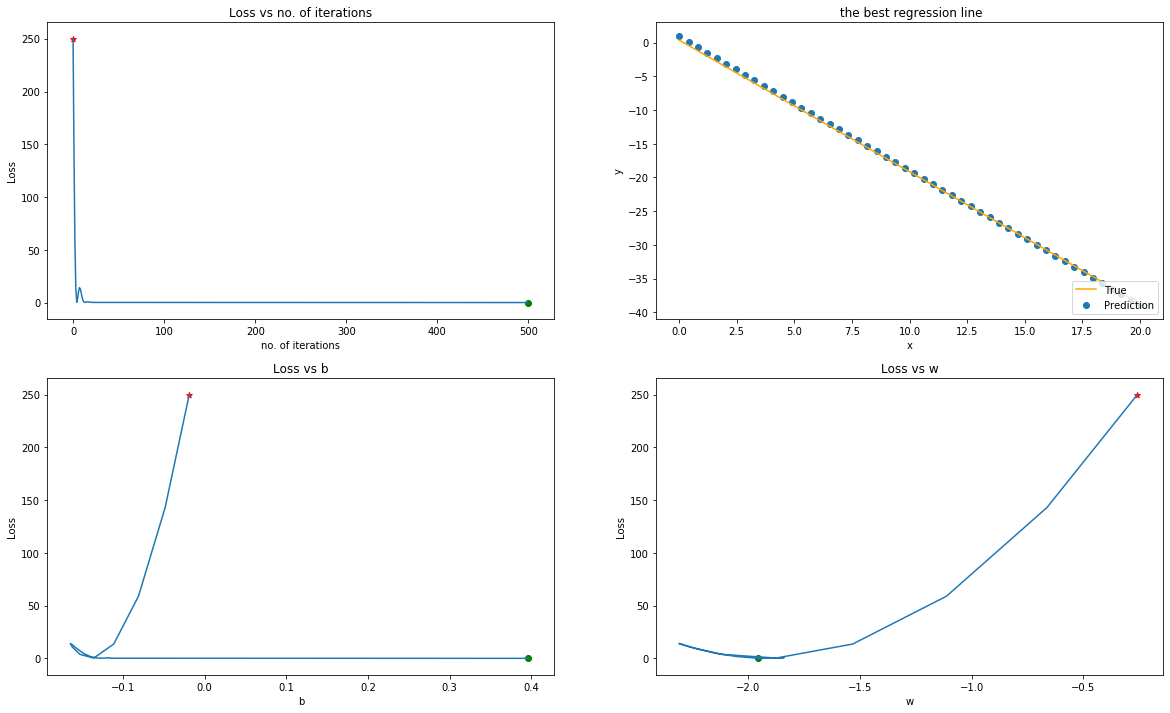

In [115]:
#ploting DG with NAG

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



# GD with Adagrad

In [116]:
w, b, loss, w_list, b_list = Gd_adagrad(x, y, alpha=1, eps=1e-10, max_iterations=100)
r=my_r2_score(y, h(w,b,x))

r2 score 0.9984292978774192


Text(0, 0.5, 'Loss')

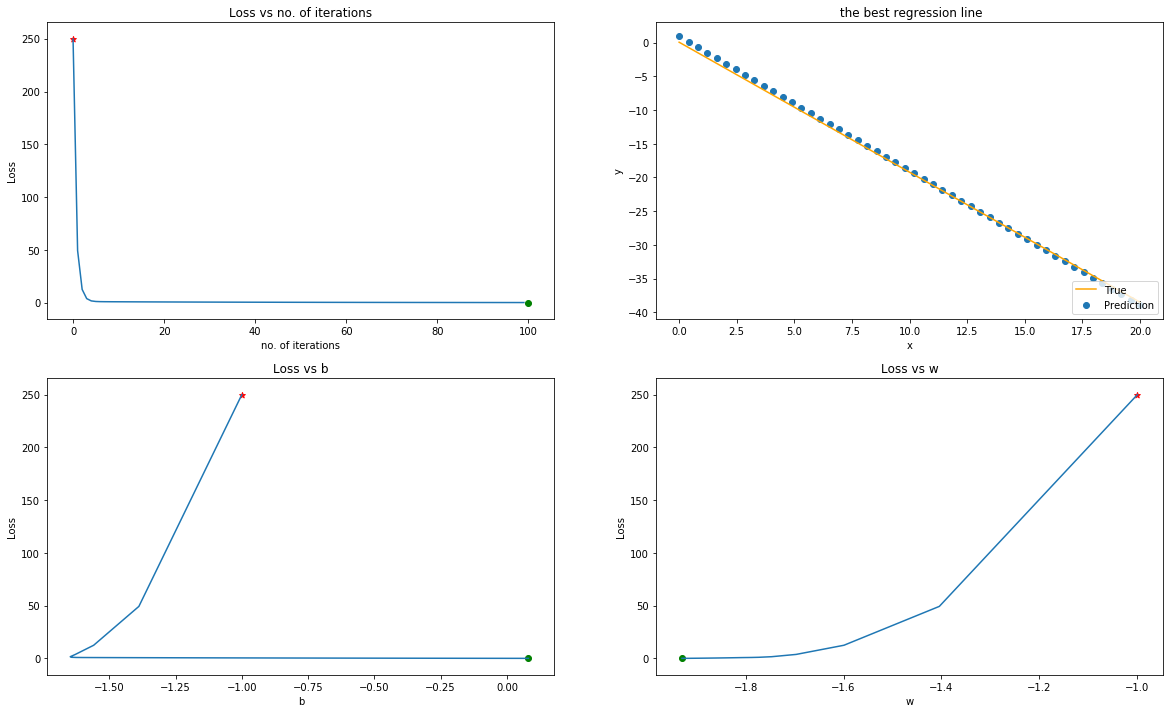

In [117]:
#ploting GD with Adagrad

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



# GD with RMSProp

In [118]:
w, b, loss, w_list, b_list = Gd_RMSProp(x, y, alpha=0.01,eps=1e-10,gamma=0.9, max_iterations=500)
r=my_r2_score(y, h(w,b,x))

r2 score 0.9999614357928759


Text(0, 0.5, 'Loss')

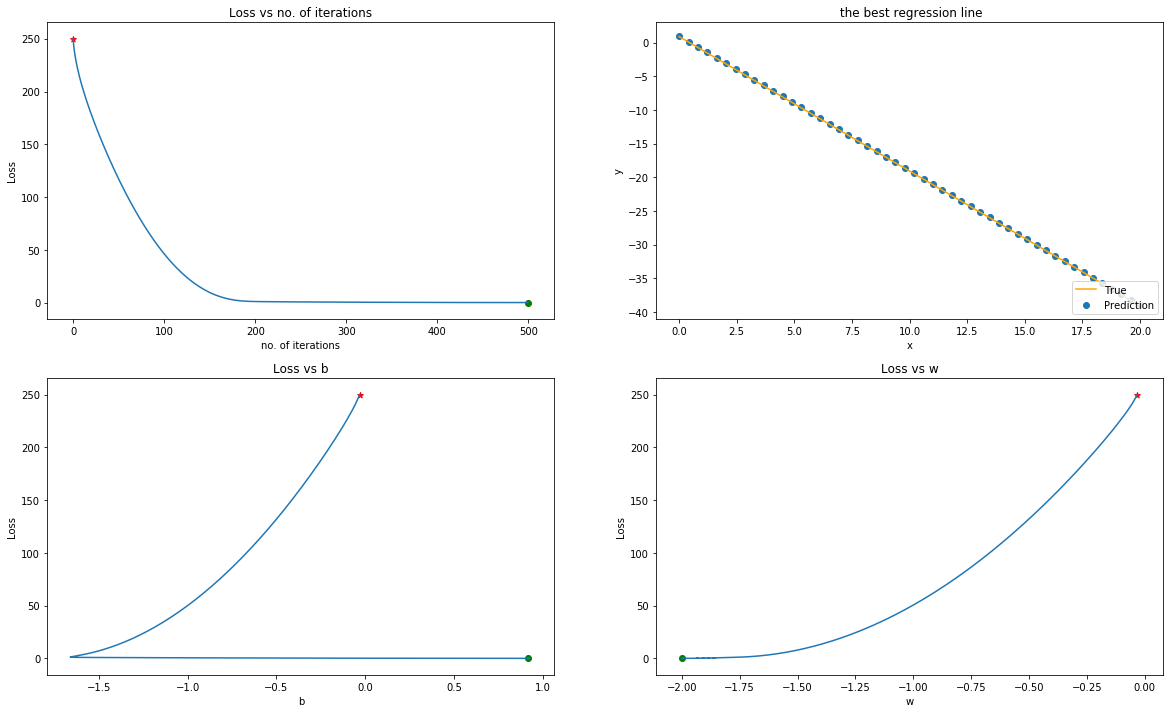

In [119]:
#ploting with RMSProp

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")



# Gd with ADAM

In [120]:
w,b,loss,w_list,b_list = Gd_adam(x,y,alpha=0.1,eps=1e-10,gamma1=0.9,gamma2=0.999, max_iterations=200)
r=my_r2_score(y, h(w,b,x))

r2 score 0.9978161027360758


Text(0, 0.5, 'Loss')

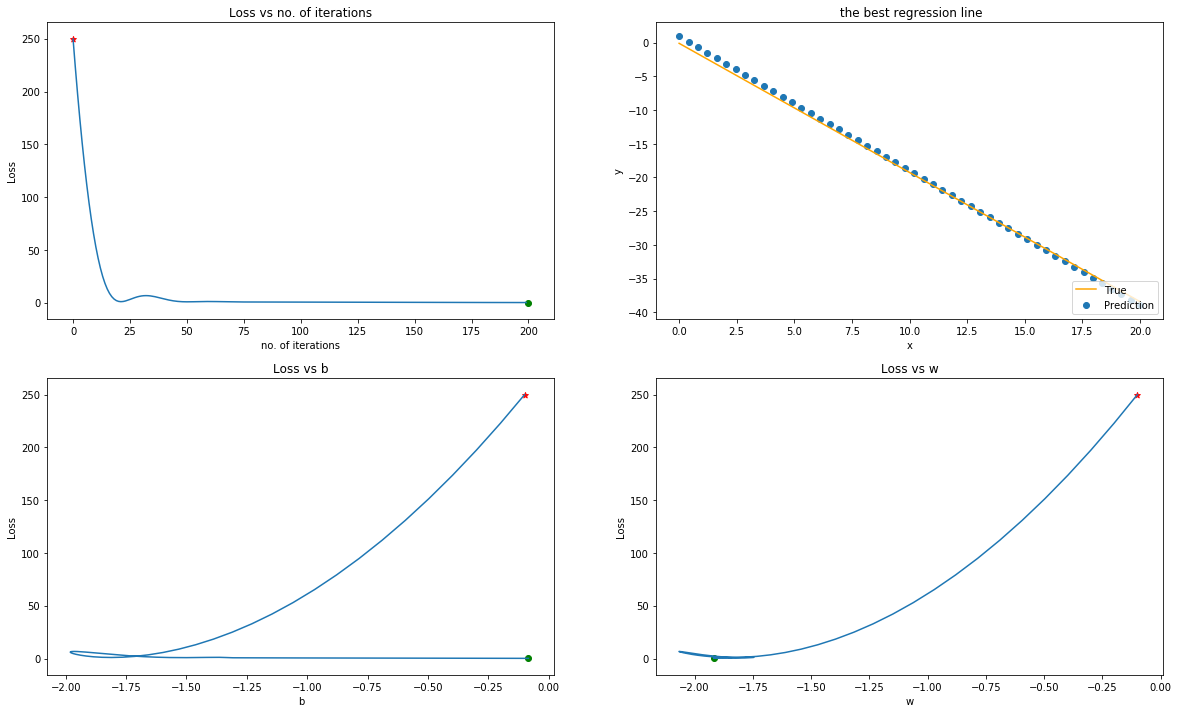

In [121]:
#ploting GD with Adam

#plotting x vs y
#plt.scatter(x, y)

#plotting loss vs epochs
plt.figure(figsize=(20, 12))
plt.subplot(221)
plt.plot(loss)
plt.scatter(0,loss[0], marker='*', c='r')
plt.scatter(len(loss),loss[-1], marker='o', c='g')
plt.title("Loss vs no. of iterations")
plt.xlabel("no. of iterations")
plt.ylabel("Loss")


#plotting the best regression line
plt.subplot(222)
plt.scatter(x, y)
plt.plot(x, h(w,b,x),color = 'orange')
plt.title(" the best regression line")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(["True", "Prediction"], loc ="lower right")

#plotting loss vs b
plt.subplot(223)
plt.plot(np.squeeze(b_list),loss)
plt.scatter(np.squeeze(b_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(b_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs b")
plt.xlabel("b")
plt.ylabel("Loss")

#plotting loss vs w
plt.subplot(224)
plt.plot(np.squeeze(w_list),loss)
plt.scatter(np.squeeze(w_list)[0],loss[0], marker='*', c='r')
plt.scatter(np.squeeze(w_list)[-1],loss[-1], marker='o', c='g')
plt.title("Loss vs w")
plt.xlabel("w")
plt.ylabel("Loss")

